# MODELAMIENTO

El dataset que usaremos en primera instancia sera el data set 6

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df = pd.read_csv('dataset6.csv')
df.head()

,temperatura,sensacion_termica,humedad,velocidad_viento,total_alquileres,temporada_1,temporada_2,temporada_3,temporada_4,anio_0,...,dia_semana_3.0,dia_semana_4.0,dia_semana_5.0,dia_semana_6.0,dia_trabajo_0,dia_trabajo_1,clima_1,clima_2,clima_3,clima_4
0,0.24,0.2879,0.81,0.0,16.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.22,0.2727,0.80,0.0,40.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.22,0.2727,0.80,0.0,32.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.24,0.2879,0.75,0.0,13.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.24,0.2879,0.75,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


Realizar las transformaciones respectivas, usar standardScaler, minMaxScaler, entre otros

In [12]:
# Separar características (X) y etiqueta (y)
X = df.drop(columns=["total_alquileres"])
y = df["total_alquileres"]

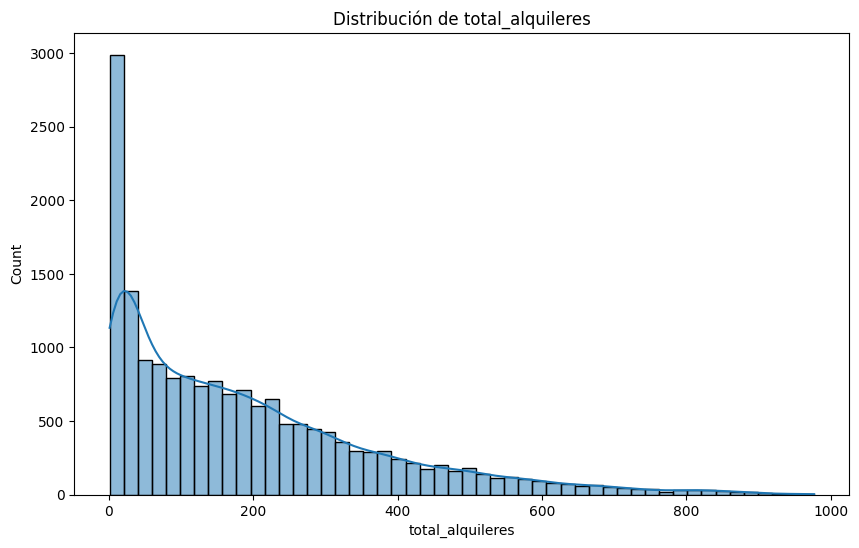

In [20]:
# Ver distribución de la variable objetivo
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=50, kde=True)
plt.title('Distribución de total_alquileres')
plt.show()

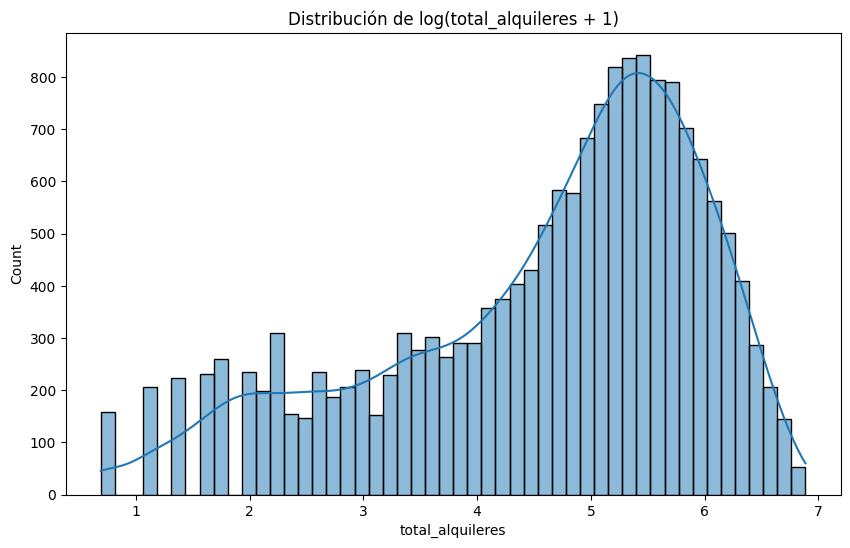

In [21]:
# Podríamos considerar aplicar una transformación logarítmica si la distribución es muy sesgada
y_log = np.log1p(y)
plt.figure(figsize=(10, 6))
sns.histplot(y_log, bins=50, kde=True)
plt.title('Distribución de log(total_alquileres + 1)')
plt.show()

In [22]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Escalar características para modelos sensibles a la escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Diccionario para resultados
results = {}

In [25]:
# 1. Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)
results['Regresión Lineal'] = {
    "RMSE": np.sqrt(mean_squared_error(y_test, lr_preds)),
    "R²": r2_score(y_test, lr_preds)
}


In [26]:
# 2. Random Forest
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
results['Random Forest'] = {
    "RMSE": np.sqrt(mean_squared_error(y_test, rf_preds)),
    "R²": r2_score(y_test, rf_preds)
}

In [27]:
# 3. HistGradientBoosting (más rápido que XGBoost y sin necesidad de escalar)
hgb_model = HistGradientBoostingRegressor(random_state=42)
hgb_model.fit(X_train, y_train)
hgb_preds = hgb_model.predict(X_test)
results['HistGradientBoosting'] = {
    "RMSE": np.sqrt(mean_squared_error(y_test, hgb_preds)),
    "R²": r2_score(y_test, hgb_preds)
}

In [28]:
# Mostrar resultados
for model, metrics in results.items():
    print(f"{model}: RMSE = {metrics['RMSE']:.2f}, R² = {metrics['R²']:.3f}")

Regresión Lineal: RMSE = 102.43, R² = 0.678
Random Forest: RMSE = 50.55, R² = 0.922
HistGradientBoosting: RMSE = 45.95, R² = 0.935
